In [10]:
from sklearn.datasets import make_blobs, make_moons, make_circles
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

To evaluate this algorithms we will use 3 kinds of toy datasets: blobls, moons and circles. This are fictional datasets designed to emulate the behaviour of real datasets with specific distributions.

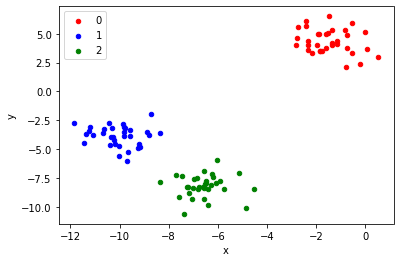

In [19]:
# generate 2d classification dataset as blobs
X_blobs, y_blobs = make_blobs(n_samples=100, centers=3, n_features=2, random_state=1)
# scatter plot, dots colored by class value
df_blobs = DataFrame(dict(x=X_blobs[:,0], y=X_blobs[:,1], label=y_blobs))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df_blobs.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

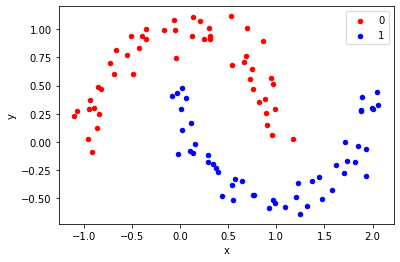

In [12]:
# generate 2d classification dataset as moons
X_moons, y_moons = make_moons(n_samples=100, noise=0.1, random_state=0)
# scatter plot, dots colored by class value
df_moons = DataFrame(dict(x=X_moons[:,0], y=X_moons[:,1], label=y_moons))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df_moons.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

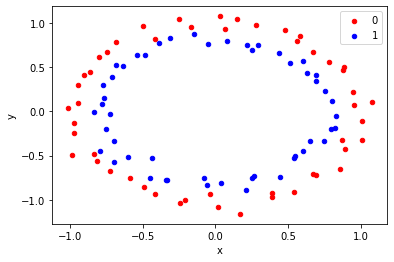

In [13]:
# generate 2d classification dataset as circles
X_circles, y_circles = make_circles(n_samples=100, noise=0.05, random_state=0)
# scatter plot, dots colored by class value
df_circles = DataFrame(dict(x=X_circles[:,0], y=X_circles[:,1], label=y_circles))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df_circles.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [14]:
# Initializing Classifiers

clf1 = SVC(kernel='linear', random_state=0, probability=True)
clf2 = SVC(kernel='rbf', random_state=0, probability=True)

clfs = [clf1, clf2]

In [15]:
# Plotting Decision Regions

def plot_decision(X, y, clfs):
    gs = gridspec.GridSpec(2, 2)
    fig = plt.figure(figsize=(10, 8))

    labels = ['SVM (linear)',
            'SVM (RBF)']

    for clf, lab, grd in zip(clfs,
                            labels,
                            itertools.product([0, 1],
                            repeat=2)):
        clf.fit(X, y)
        ax = plt.subplot(gs[grd[0], grd[1]])
        fig = plot_decision_regions(X=X, y=y,
                                    clf=clf, legend=2)
        plt.title(lab)

    plt.show()

Here we plot the difference between linear and RBF kernels in the case of a blob distribution. We conclude that there is not a big difference in this case, because the data can be linearly separated.

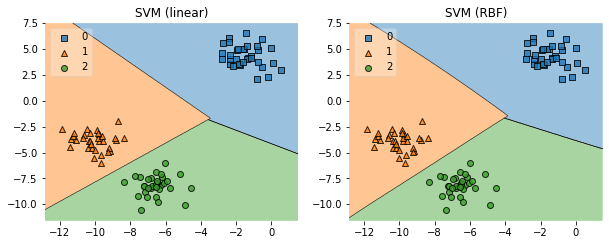

In [20]:
plot_decision(X_blobs, y_blobs, clfs)

Here, for the moons, we start to take notice of the advantage of the RBF kernel. The linear kernel is unable to separate the two classes completly whereas the RBF can fit it perfecly.

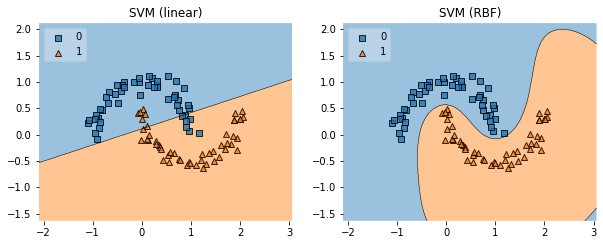

In [17]:
plot_decision(X_moons, y_moons, clfs)

In the case of the circular data, we can see that the linear kernel is useless, as it completly fails to distinguish between the two classes.

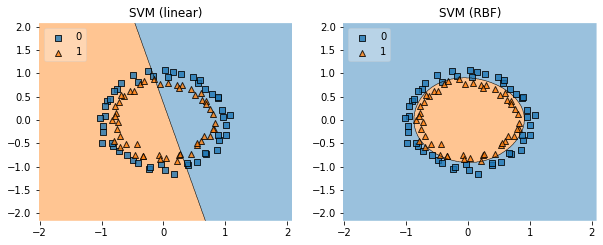

In [18]:
plot_decision(X_circles, y_circles, clfs)